In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

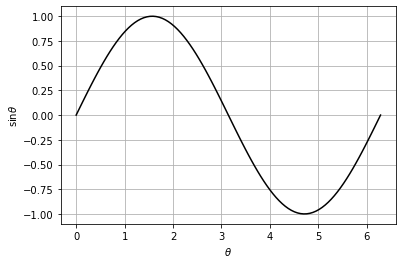

In [3]:
theta = np.linspace(0, 2*np.pi, 100)

figure, axis = plt.subplots()
axis.plot(theta, np.sin(theta), 'k-')
axis.set_xlabel(r'$\theta$')
axis.set_ylabel(r'$\sin\theta$')
axis.grid()

figure.show()